# Project: Predict used_cars prices

## Table of Contents
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='intro'></a>
## Introduction

> The dataset is about used cars, and our goal is to identify the characteristics that affect their prices and predict them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

<a id='wrangling'></a>
## Data Wrangling


In [2]:
cars=pd.read_csv("used_cars_data.csv")

In [3]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
for i in cars.columns:
    print(i)
    print(cars[i].isnull().sum()/cars.shape[0])
    print('='*10)

S.No.
0.0
Name
0.0
Location
0.0
Year
0.0
Kilometers_Driven
0.0
Fuel_Type
0.0
Transmission
0.0
Owner_Type
0.0
Mileage
0.0002757479663587481
Engine
0.006342203226251206
Power
0.006342203226251206
Seats
0.0073073211085068245
New_Price
0.8612987729215497
Price
0.1701364952433476


# insights
    1- New_price about 80% is missing.
    2 seats,engine,power ,mileage have very low number of missing data
    3-Price which is the target  17% missing data
    

#  let's explore categorical feature


In [5]:
cars.describe(include="O")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,7253,7253,7253,7253,7253,7251,7207,7207,1006
unique,2041,11,5,2,4,450,150,386,625
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,63.71 Lakh
freq,55,949,3852,5204,5952,207,732,280,6


In [6]:
cat_col=[
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
"Seats","Year"
 ]
for column in cat_col:
    print(column)
    print(cars[column].value_counts())
    print("="*40)

Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996 

### observations 
    1.maximum car being sold in mumbai
    2-cars having manual transmission tends to be more available in market
    3-most commen cars in the market have 5 seats
    4- first owner car holder tend to sell their cars more than others


In [7]:
cars[["Engine","Power","Mileage"]].head()

,Engine,Power,Mileage
0,998 CC,58.16 bhp,26.6 km/kg
1,1582 CC,126.2 bhp,19.67 kmpl
2,1199 CC,88.7 bhp,18.2 kmpl
3,1248 CC,88.76 bhp,20.77 kmpl
4,1968 CC,140.8 bhp,15.2 kmpl


In [8]:
# pre processes those columns
cars["Mileage"]=cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"]=cars["Mileage"].str.rstrip(" km/kg")

In [9]:
cars["Engine"]=cars["Engine"].str.rstrip(" CC")
cars["Power"]=cars["Power"].str.rstrip("bhp")


In [10]:
cars[["Engine","Power","Mileage"]].head()

,Engine,Power,Mileage
0,998,58.16,26.6
1,1582,126.2,19.67
2,1199,88.7,18.2
3,1248,88.76,20.77
4,1968,140.8,15.2


In [11]:
cars["Power"].unique().tolist()

['58.16 ',
 '126.2 ',
 '88.7 ',
 '88.76 ',
 '140.8 ',
 '55.2 ',
 '63.1 ',
 '171.5 ',
 '103.6 ',
 '74 ',
 '103.25 ',
 '116.3 ',
 '187.7 ',
 '115 ',
 '175.56 ',
 '98.6 ',
 '83.8 ',
 '167.62 ',
 '190 ',
 '88.5 ',
 '177.01 ',
 '80 ',
 '67.1 ',
 '102 ',
 '108.45 ',
 '138.1 ',
 '184 ',
 '179.5 ',
 '103.5 ',
 '64 ',
 '82 ',
 '254.8 ',
 '73.9 ',
 '46.3 ',
 '37.5 ',
 '77 ',
 '82.9 ',
 '149.92 ',
 '138.03 ',
 '112.2 ',
 '163.7 ',
 '71 ',
 '105 ',
 '174.33 ',
 '75 ',
 '103.2 ',
 '53.3 ',
 '78.9 ',
 '147.6 ',
 '147.8 ',
 '68 ',
 '186 ',
 '170 ',
 '69 ',
 '140 ',
 '78 ',
 '194 ',
 '500 ',
 '108.5 ',
 '86.8 ',
 '187.74 ',
 'null ',
 '132 ',
 '86.7 ',
 '73.94 ',
 '117.3 ',
 '218 ',
 '168.5 ',
 '89.84 ',
 '110 ',
 '90 ',
 '82.85 ',
 '67 ',
 '241.4 ',
 '35 ',
 '270.9 ',
 '126.32 ',
 '73 ',
 '130 ',
 '100.6 ',
 '150 ',
 '75.94 ',
 '215 ',
 '107.3 ',
 '37.48 ',
 '120 ',
 '178 ',
 '152 ',
 '91.1 ',
 '85.80 ',
 '362.07 ',
 '121.3 ',
 '143 ',
 '81.80 ',
 '171 ',
 '76.8 ',
 '103.52 ',
 '444 ',
 '362.9 ',
 '6

In [12]:
cars["Power"].isnull().sum()

46

In [13]:
cars[cars["Power"]=='null '].count()

S.No.                129
Name                 129
Location             129
Year                 129
Kilometers_Driven    129
Fuel_Type            129
Transmission         129
Owner_Type           129
Mileage              129
Engine               129
Power                129
Seats                125
New_Price              0
Price                107
dtype: int64

In [14]:
cars["Power"].replace("null ",value=np.nan,inplace=True)

In [15]:
# guarentee that those columns ready to be converted to numerical columns
cars.query("Power == '0.0'")["Power"].count()

0

In [16]:
cars["Power"].isnull().sum()

175

In [17]:
# replace 0 in  this numeric columns with nan
cars.loc[cars["Mileage"]=="0.0","Mileage"]=np.nan
cars.loc[cars["Engine"]=="0.0","Engine"]=np.nan
cars.loc[cars["Seats"]=="0.0","Seats"]=np.nan

In [18]:
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [19]:
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [20]:
# create column for age of the car
cars["now"]=2021
cars["age"]=cars["now"]-cars["Year"]
cars.drop("now",axis=1,inplace=True)
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,10
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,9
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,8


A new column will be added here representing the brand of the car and its model.

In [21]:
cars["Brand"]=cars["Name"].str.split(" ").str[0]
cars["Model"]=cars["Name"].str.split(" ").str[1]+cars["Name"].str.split(" ").str[2]
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,6,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,10,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,9,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,8,Audi,A4New


In [22]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [23]:
cars.loc[cars.Brand=="ISUZU","Brand"]="Isuzu"

In [24]:
cars.Model.isnull().sum()

1

In [25]:
cars.dropna(subset=["Model"],axis=0,inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


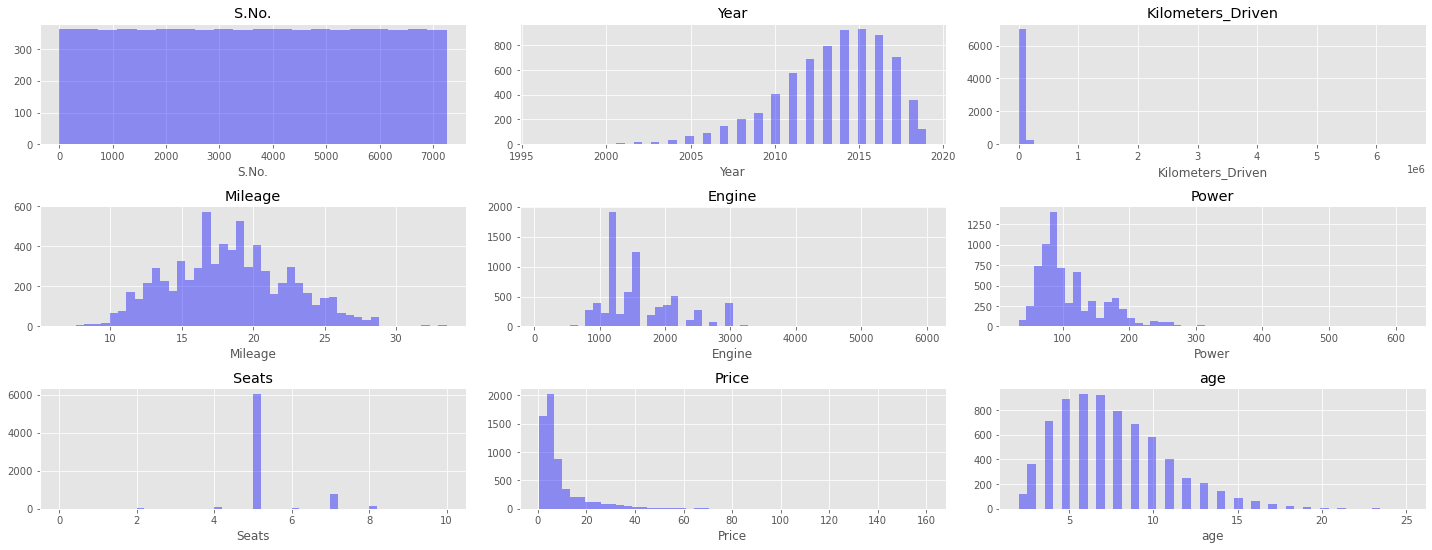

In [26]:

plt.style.use('ggplot')
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

### From above:
Only Mileage column is normally distributed.

In [27]:
# Each column's missing value as a percentage
for i in cars.columns:
    print(i)
    print(cars[i].isnull().sum()/cars.shape[0])
    print('='*10)

S.No.
0.0
Name
0.0
Location
0.0
Year
0.0
Kilometers_Driven
0.0
Fuel_Type
0.0
Transmission
0.0
Owner_Type
0.0
Mileage
0.011445118587975731
Engine
0.0063430777716492
Power
0.02413127413127413
Seats
0.007308328736900165
New_Price
0.8612796469939327
Price
0.17002206287920574
age
0.0
Brand
0.0
Model
0.0


In [28]:
cars['Engine']=cars.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['age'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [29]:
cars[['Engine','Power','Mileage']].isnull().sum()

Engine      45
Power      162
Mileage      0
dtype: int64

In [30]:
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))
cars[['Engine','Power']].isnull().sum()

Engine    18
Power     63
dtype: int64

In [31]:
cars['Engine']=cars.groupby(['Fuel_Type'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Fuel_Type'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Fuel_Type'])['Mileage'].apply(lambda x:x.fillna(x.mean()))
cars[['Engine','Power','Mileage']].isnull().sum()

Engine     0
Power      0
Mileage    0
dtype: int64

In [32]:
cars['Seats']=cars.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [33]:
cars['Seats'].isnull().sum()

46

In [34]:
cars['Seats']=cars.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))
cars['Seats'].isnull().sum()

22

In [35]:
cars['Seats']=cars.groupby(['Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
cars['Seats'].isnull().sum()

0

The new price column has 86% of its values missed.

In [36]:
cars['Location']=cars['Location'].astype('category')
del cars['New_Price']

In [37]:
for i in cars.columns:
    print(i)
    print(cars[i].isnull().sum()/cars.shape[0])
    print('='*10)

S.No.
0.0
Name
0.0
Location
0.0
Year
0.0
Kilometers_Driven
0.0
Fuel_Type
0.0
Transmission
0.0
Owner_Type
0.0
Mileage
0.0
Engine
0.0
Power
0.0
Seats
0.0
Price
0.17002206287920574
age
0.0
Brand
0.0
Model
0.0


In [38]:
cars.dropna(subset=['Price'],axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


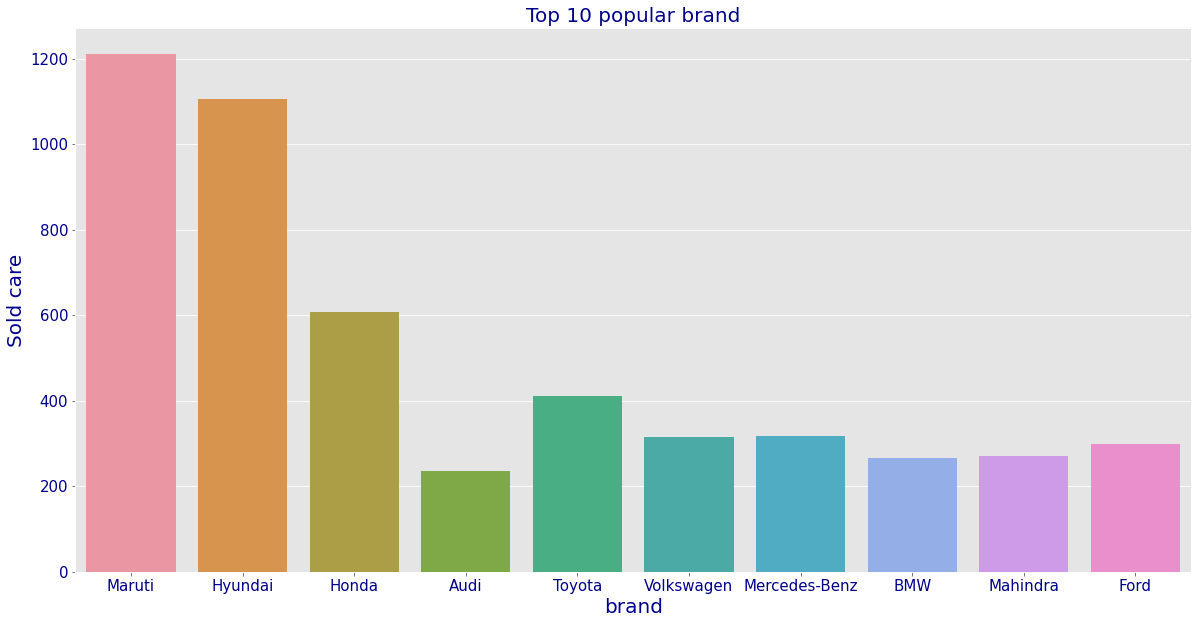

In [39]:
fig,ax=plt.subplots(figsize=(20,10))
font={'size':20,'color':'darkblue'}
sns.countplot(cars[cars['Brand'].isin (cars.groupby("Brand")["Brand"].size().nlargest(10).index)]['Brand'])
plt.title('Top 10 popular brand',fontdict=font)
plt.xticks(fontsize=15,color='darkblue')
plt.yticks(fontsize=15,color='darkblue')
plt.xlabel('brand',fontdict=font)
plt.ylabel('Sold care',fontdict=font);

The most popular brand is maruti followed by hyundai.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


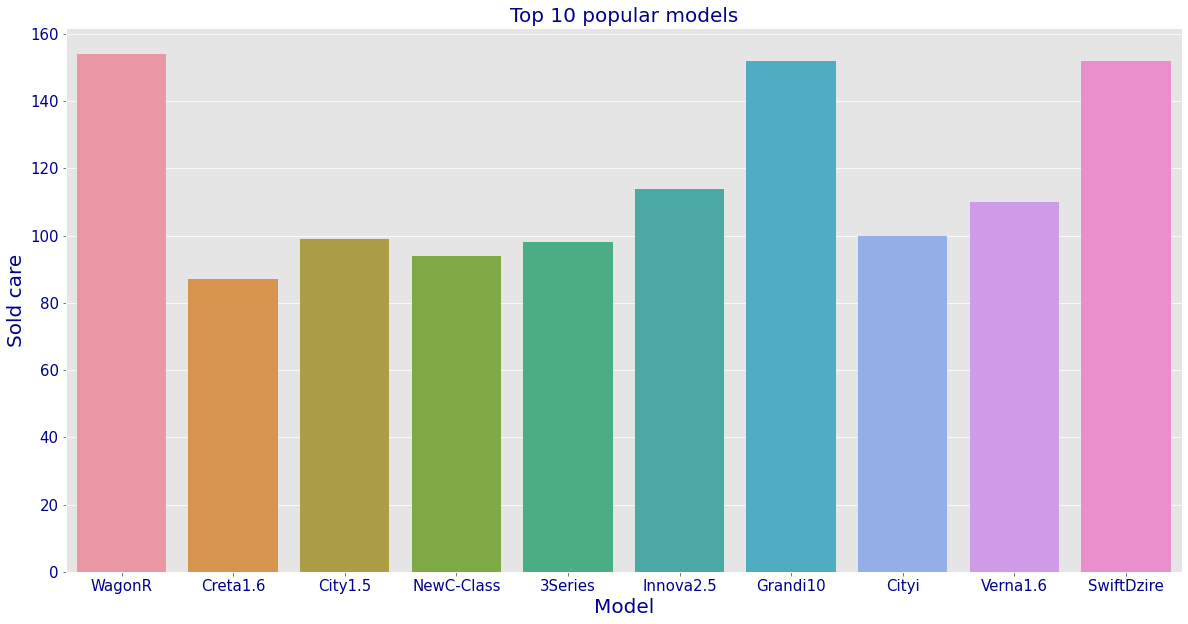

In [40]:
fig,ax=plt.subplots(figsize=(20,10))
font={'size':20,'color':'darkblue'}
sns.countplot(cars[cars['Model'].isin (cars.groupby("Model")["Model"].size().nlargest(10).index)]['Model'])
plt.title('Top 10 popular models',fontdict=font)
plt.xticks(fontsize=15,color='darkblue')
plt.yticks(fontsize=15,color='darkblue')
plt.xlabel('Model',fontdict=font)
plt.ylabel('Sold care',fontdict=font);

The most popular Model is WagonR followed by SwiftDzire.

In [41]:
cars.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,age
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.324187,1619.926566,112.581871,5.277122,9.479468,7.641801
std,1737.679967,3.269742,9.126884e+04,4.158433,600.553277,53.607960,0.806644,11.187917,3.269742
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,0.000000,0.440000,2.000000
25%,1504.500000,2011.000000,3.400000e+04,15.300000,1198.000000,74.915000,5.000000,3.500000,5.000000
50%,3009.000000,2014.000000,5.300000e+04,18.200000,1493.000000,93.700000,5.000000,5.640000,7.000000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000,10.000000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,23.000000


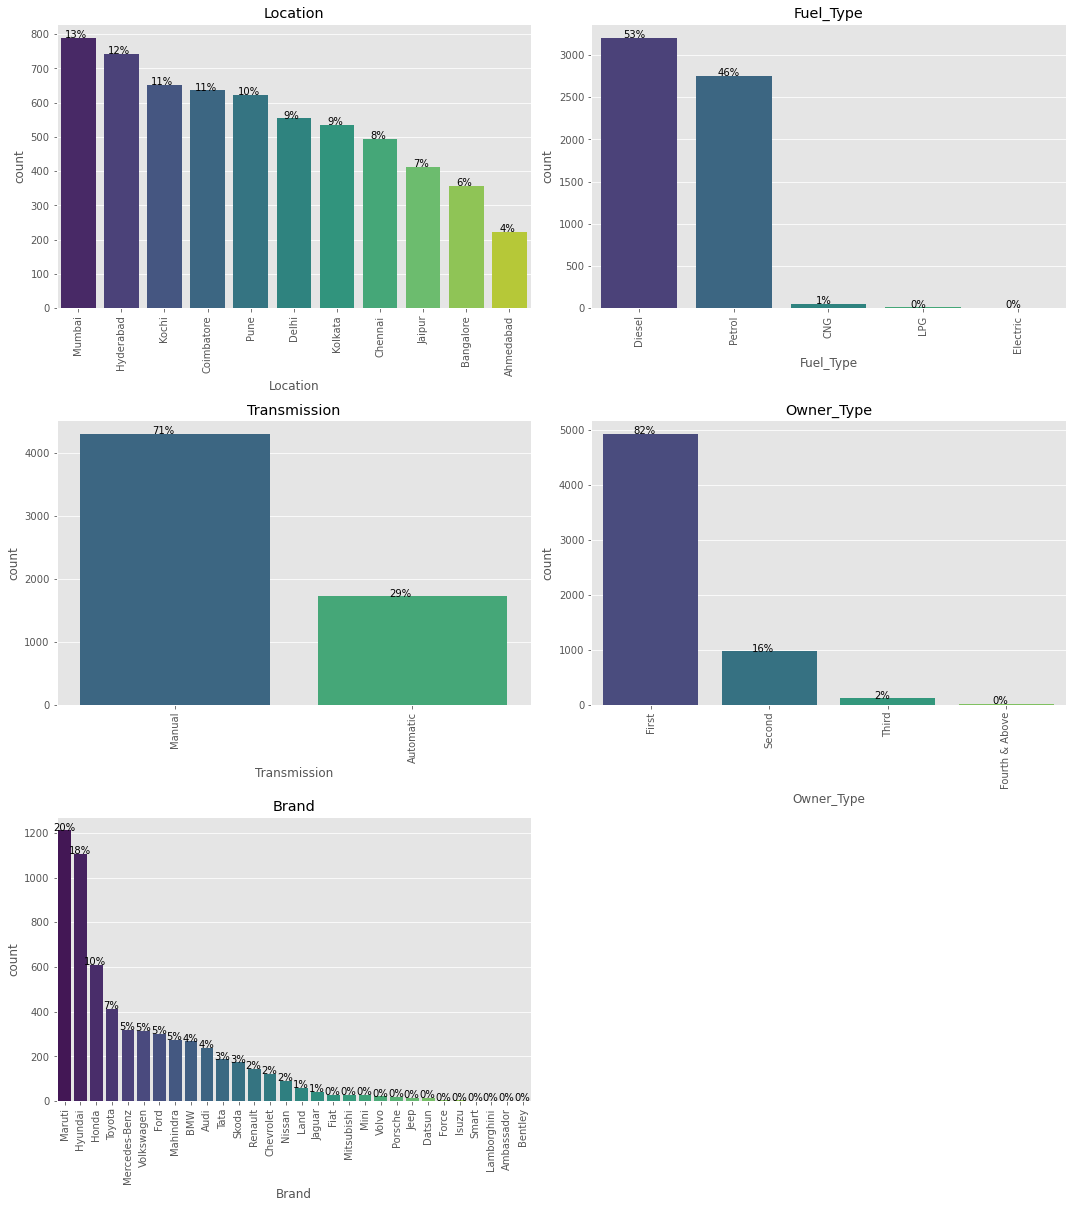

In [42]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] 

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                            percentage = '{:.0f}%'.format(100 * p.get_height()/len(cars[variable]))
                            x = p.get_x() + p.get_width()/2 -.05
                            y = p.get_y() + p.get_height()
                            plt.annotate(percentage, (x, y),ha='center')
                            plt.xticks(rotation=90)
                            plt.tight_layout()
                            plt.title(variable)

### From above:
> Maruti is the most popular brand, and about half of the brands are less than 1%.
> 
> 72% of the cars are manual.
> 
> First-time sellers make up 82% of all sales.
> 
> Petrol and diesel cars account for 99% of all sales.
> 
> Mumbai has the highest number of car sales, while Ahmedabad has the lowest.

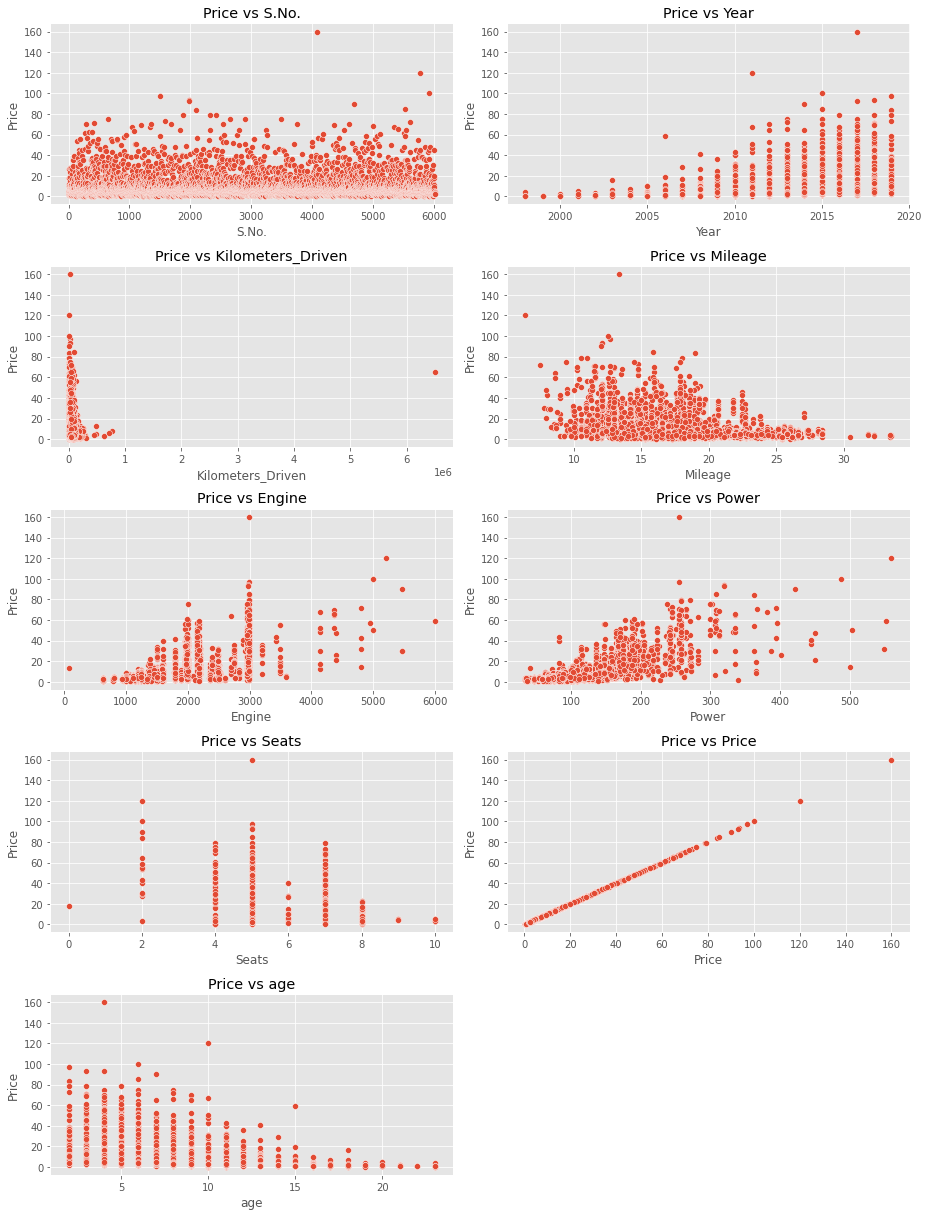

In [43]:
numeric_columns= cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

### From above:
> There is negative correlation between price and age of the cars, and between the price and the mileage.
> 
> Power, engine type, and year features have a positive correlation with price.

In [44]:
low=['Maruti','Hyundai','Ambassdor','Hindustan','Force','Chevrolet','Fiat','Tata','Smart','Renault','Datsun','Mahindra','Skoda','Ford','Toyota','ISUZU','Mitsubishi','Honda']
high=['Audi','Mini Cooper','Bentley','Mercedes-Benz','Lamborghini','Volkswagen','Porsche','Land','Nissan','Volvo','Jeep','Jaguar','BMW']

In [45]:
def classrange(x):
    if x in low:
        return 'low'
    elif x in high:
        return 'high'
    else:
        return x

In [46]:
cars['Brand_class']=cars['Brand'].apply(lambda x:classrange(x))
del cars['Brand']


We here trying to make a new column represent the class of brands.

In [47]:
del cars['S.No.']
del cars['Model']
del cars['Name']

In [48]:
def plot_pie(x,lab,tit):
    fig,ax=plt.subplots(figsize=(8,8))
    fon={'size':14,'color':'darkblue'}
    colors = sns.color_palette('bright')
    plt.pie(x.values,labels=lab,colors=colors,autopct='%.0f%%', textprops={'fontsize': 14,'color':'darkblue'})
    ax.set_title('Percentage of sold cars divided by '+tit,fontdict=fon)

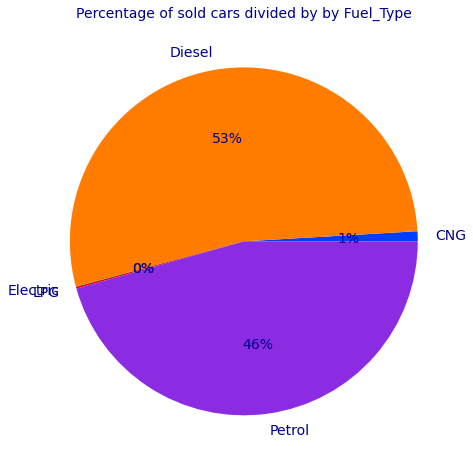

In [49]:
x=cars.groupby('Fuel_Type')['Fuel_Type'].size()
plot_pie(x,x.index,'by Fuel_Type');

Diesel cars make up 53% of cars sold, while petrol cars make up 46%.


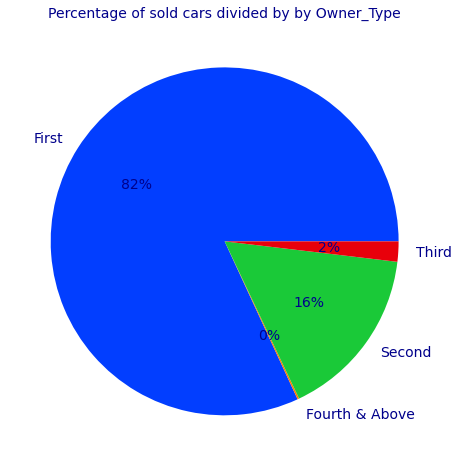

In [50]:
x=cars.groupby('Owner_Type')['Owner_Type'].size()
plot_pie(x,x.index,'by Owner_Type');

First owner cars make up 82% of cars sold, while secound owner cars make up 16%.

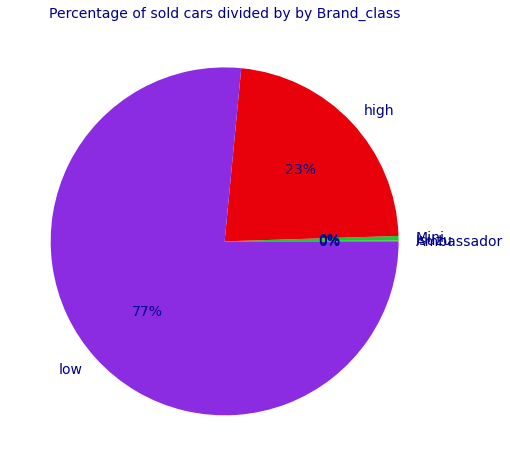

In [51]:
x=cars.groupby('Brand_class')['Brand_class'].size()
plot_pie(x,x.index,'by Brand_class');

High class brand cars make up 23% of cars sold, while low class brand cars make up 77%.

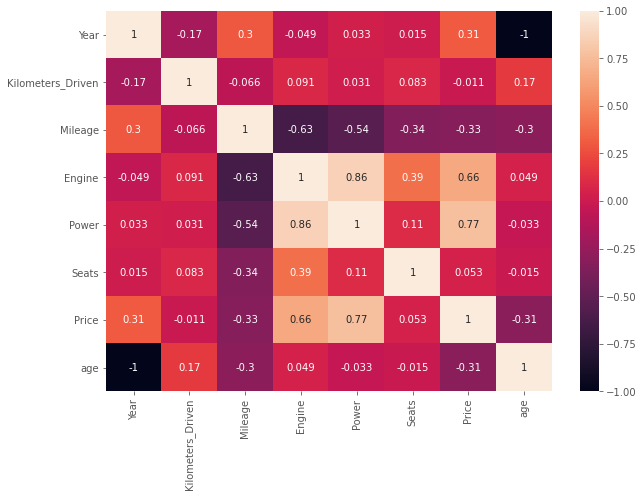

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(cars.corr(),annot=True);

From above:
power  and engine features have a high correlation with the price

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

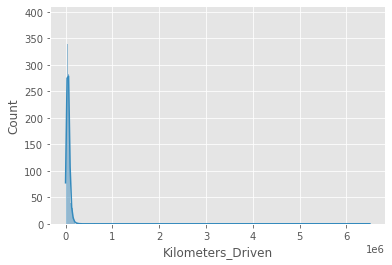

In [53]:
sns.histplot(cars.Kilometers_Driven,kde=True)


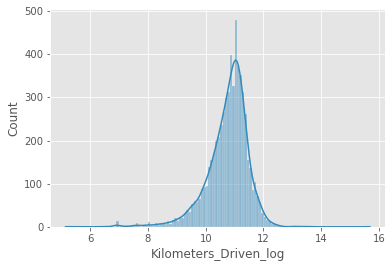

In [54]:
#enhancing the Kilometers Driven column distribution.
cars['Kilometers_Driven_log']=np.log(cars['Kilometers_Driven'])
sns.histplot(cars['Kilometers_Driven_log'],kde=True);

In [55]:
cars.drop('Kilometers_Driven',axis=1,inplace=True)

In [56]:
cars.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age,Brand_class,Kilometers_Driven_log
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11,low,11.184421
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,low,10.621327
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10,low,10.736397
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9,low,11.373663
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8,high,10.613246


# ML:
### Building a model to predict the used_caes prices.

In [57]:
df=cars.copy()

In [58]:
col=[i for i in df.columns if i not in df.select_dtypes(include=np.number).columns.tolist()]
for i in col:
    print(i)
    print(df[i].nunique())
    print('='*40)

Location
11
Fuel_Type
5
Transmission
2
Owner_Type
4
Brand_class
5


In [59]:
df=pd.get_dummies(df,columns=['Brand_class','Owner_Type','Transmission','Fuel_Type','Location'])

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,make_scorer

In [61]:
minmax=MinMaxScaler()
x=minmax.fit_transform(df.drop('Price',axis=1))
y=minmax.fit_transform((np.array(df['Price']).reshape(-1,1)))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [62]:
g={'SVM':{'model':SVR(gamma='auto'),'params':{'kernel':['rbf','linear'],'C':[1,5,10]}},'RF':{'model':RandomForestRegressor(),'params':{'n_estimators':[50,100,150]}},'GB':{'model':GradientBoostingRegressor(),'params':{'n_estimators':[50,100,150]}}}
score=[]
scorer = make_scorer(r2_score)
for mod,m in g.items():
    gs=GridSearchCV(m['model'],m['params'],cv=5, scoring=scorer)
    gs.fit(X_train,y_train.ravel())
    score.append({'model':mod,'best_score':gs.best_score_,'best param':gs.best_params_,'best estimator':gs.best_estimator_})

In [63]:
score

[{'model': 'SVM',
  'best_score': 0.6376239455918358,
  'best param': {'C': 5, 'kernel': 'rbf'},
  'best estimator': SVR(C=5, gamma='auto')},
 {'model': 'RF',
  'best_score': 0.8794761597368843,
  'best param': {'n_estimators': 100},
  'best estimator': RandomForestRegressor()},
 {'model': 'GB',
  'best_score': 0.8894106387961566,
  'best param': {'n_estimators': 150},
  'best estimator': GradientBoostingRegressor(n_estimators=150)}]

In [64]:
for i in score:
    pridcted=i['best estimator'].predict(X_test)
    print(i['model'])
    print('R2 Score = ',r2_score(y_test, pridcted))
    print('Mean Squared Error = ',mean_squared_error(y_test, pridcted))
    print('Mean Absolute Error = ',mean_absolute_error(y_test, pridcted))

SVM
R2 Score =  0.624744636696632
Mean Squared Error =  0.0017669402968600889
Mean Absolute Error =  0.03240273771528365
RF
R2 Score =  0.911676540298098
Mean Squared Error =  0.00041588287701360157
Mean Absolute Error =  0.009110914545731659
GB
R2 Score =  0.8865478716860654
Mean Squared Error =  0.0005342045894234746
Mean Absolute Error =  0.010824235836525633


Random_Forest is the best model for best n_estimaters=150 and best score=.89 and for the test data R2 Score = 0.911676540298098;
Mean Squared Error =  0.00041588287701360157;
Mean Absolute Error =  0.009110914545731659.

Now we want to know the Feature Importance in the Random forest model.

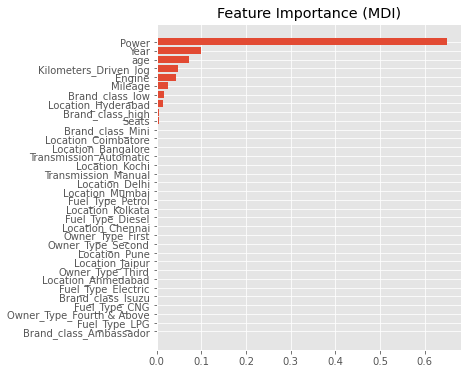

In [65]:
importances=score[1]['best estimator'].feature_importances_
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, importances[sorted_idx], align="center")
plt.yticks(pos, np.array(df.drop('Price',axis=1).columns)[sorted_idx])
plt.title("Feature Importance (MDI)");

Now we will reduce the columns and use the most important features.

In [66]:
mms_x=MinMaxScaler()
mms_y=MinMaxScaler()
x_final=mms_x.fit_transform(df[['Power','Year','age','Kilometers_Driven_log','Engine','Mileage','Brand_class_low','Location_Hyderabad','Seats','Brand_class_high','Brand_class_Mini']])
y_final=mms_y.fit_transform(np.array(df['Price']).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 0)
clf=RandomForestRegressor()
gs=GridSearchCV(clf,{'n_estimators':[45,50,55,60],'min_samples_leaf':[2,3,4],'min_samples_split':[2,3,4]},cv=5, scoring=scorer,error_score='raise')
gs.fit(X_train,y_train.ravel())
df3 = pd.DataFrame(gs.cv_results_)
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.713873,0.011279,0.018753,0.006265,2,2,45,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.823104,0.920746,0.883777,0.821076,0.919562,0.873653,0.044153,22
1,0.782791,0.002283,0.021872,0.007652,2,2,50,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.823995,0.925607,0.900145,0.823152,0.914923,0.877564,0.044820,7
2,0.867756,0.011272,0.018747,0.006246,2,2,55,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.831604,0.928079,0.898164,0.833160,0.918818,0.881965,0.041630,1
3,0.970254,0.052009,0.021872,0.007652,2,2,60,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.822067,0.922083,0.893934,0.823057,0.913879,0.875004,0.043788,17
4,0.734163,0.024674,0.015630,0.000015,2,3,45,"{'min_samples_leaf': 2, 'min_samples_split': 3...",0.830234,0.923999,0.897367,0.827639,0.916504,0.879149,0.041916,2
5,0.780995,0.000004,0.018747,0.006248,2,3,50,"{'min_samples_leaf': 2, 'min_samples_split': 3...",0.835742,0.926886,0.893329,0.820305,0.917178,0.878688,0.043062,4
6,0.864502,0.016344,0.021879,0.007646,2,3,55,"{'min_samples_leaf': 2, 'min_samples_split': 3...",0.829995,0.921416,0.888432,0.818501,0.917723,0.875213,0.043307,16
7,0.963301,0.058811,0.018745,0.006250,2,3,60,"{'min_samples_leaf': 2, 'min_samples_split': 3...",0.832010,0.915114,0.903250,0.823166,0.920057,0.878719,0.042197,3
8,0.700925,0.007176,0.015622,0.000004,2,4,45,"{'min_samples_leaf': 2, 'min_samples_split': 4...",0.832392,0.923677,0.895697,0.819577,0.916899,0.877648,0.043372,6
9,0.790845,0.018532,0.015621,0.000001,2,4,50,"{'min_samples_leaf': 2, 'min_samples_split': 4...",0.827883,0.924811,0.900401,0.822042,0.917937,0.878615,0.044563,5


In [67]:
print(gs.best_score_)
print(gs.best_params_)

0.8819649610793949
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 55}


The score is almost the same like the old random forest model.

In [68]:
pridcted=gs.predict(X_test)
print('R2 Score = ',r2_score(y_test, pridcted))
print('Mean Squared Error = ',mean_squared_error(y_test, pridcted))
print('Mean Absolute Error = ',mean_absolute_error(y_test, pridcted))

R2 Score =  0.9104512291339826
Mean Squared Error =  0.0004216524192608038
Mean Absolute Error =  0.009827716491440758


The test data R2 Score = 0.9104512291339826; 
Mean Squared Error =  0.0004216524192608038; 
Mean Absolute Error =  0.009827716491440758 so it lookes like R2 Score, Mean Absolute Error and Squared Error a little worse than the old random forest model but on the other hand, it's faster to predict using the new model.

<a id='conclusions'></a>
## Conclusions

> 1- In this project we found the most important features which affect the price are power, year, Mileage, brand, Kilometers Driven, engine, seats and age.
> 
> 2- We built some ML models and from it we found random_forest the best one.
<a id='conclusions'></a>